<a href="https://colab.research.google.com/github/Eren007-Yeager/telecomx_latam/blob/main/telecomx_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd
import requests
from pandas import json_normalize

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = json_normalize(data)

df.columns = df.columns.str.replace(r'\.', '_', regex=True)

print(df.head())
print("\n--- Info general ---")
print(df.info())


   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService inter

#🔧 Transformación

In [ ]:
print("Columnas del DataFrame:\n", df.columns.tolist())

print("\nTipos de datos:\n")
print(df.dtypes)

print("\nValores nulos por columna:\n")
print(df.isnull().sum())


Columnas del DataFrame:
 ['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']

Tipos de datos:

customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection  

In [ ]:
duplicados_totales = df.duplicated().sum()
print(f"🔁 Filas completamente duplicadas: {duplicados_totales}")


🔁 Filas completamente duplicadas: 0


In [ ]:
duplicados_id = df['customerID'].duplicated().sum()
print(f"🔁 Duplicados en 'customerID': {duplicados_id}")


🔁 Duplicados en 'customerID': 0


In [ ]:
df[df['customerID'].duplicated(keep=False)]


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [ ]:
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

print("Valores no numéricos en 'account_Charges_Total':", df['account_Charges_Total'].isnull().sum())

df = df.dropna(subset=['account_Charges_Total'])

print("\nNuevo tipo de dato:", df['account_Charges_Total'].dtype)


Valores no numéricos en 'account_Charges_Total': 11

Nuevo tipo de dato: float64


In [ ]:
cols_to_clean = [
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'phone_MultipleLines'
]

for col in cols_to_clean:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


In [ ]:
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

print(df[['account_Charges_Monthly', 'Cuentas_Diarias']].head())


   account_Charges_Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [ ]:
binarias = [
    'Churn', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport',
    'internet_StreamingTV', 'internet_StreamingMovies',
    'account_PaperlessBilling'
]

df[binarias] = df[binarias].replace({'Yes': 1, 'No': 0})


/tmp/ipython-input-2060380573.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binarias] = df[binarias].replace({'Yes': 1, 'No': 0})


In [ ]:
df = df.rename(columns={
    'Churn': 'Evasion',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Mayor_65',
    'customer_Partner': 'Tiene_Pareja',
    'customer_Dependents': 'Tiene_Dependientes',
    'customer_tenure': 'Meses_Contrato',
    'phone_PhoneService': 'Telefono',
    'phone_MultipleLines': 'Multiples_Lineas',
    'internet_InternetService': 'Servicio_Internet',
    'internet_OnlineSecurity': 'Seguridad_Online',
    'internet_OnlineBackup': 'Respaldo_Online',
    'internet_DeviceProtection': 'Proteccion_Dispositivo',
    'internet_TechSupport': 'Soporte_Tecnico',
    'internet_StreamingTV': 'TV',
    'internet_StreamingMovies': 'Peliculas',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Factura_Digital',
    'account_PaymentMethod': 'Metodo_Pago',
    'account_Charges_Monthly': 'Cargo_Mensual',
    'account_Charges_Total': 'Cargo_Total',
    'Cuentas_Diarias': 'Cargo_Diario'
})


In [ ]:
print(df.head())

print(df.columns.tolist())

print(df.dtypes)


   customerID Evasion  Genero  Mayor_65  Tiene_Pareja  Tiene_Dependientes  \
0  0002-ORFBO       0  Female         0             1                   1   
1  0003-MKNFE       0    Male         0             0                   0   
2  0004-TLHLJ       1    Male         0             0                   0   
3  0011-IGKFF       1    Male         1             1                   0   
4  0013-EXCHZ       1  Female         1             1                   0   

   Meses_Contrato  Telefono  Multiples_Lineas Servicio_Internet  \
0               9         1                 0               DSL   
1               9         1                 1               DSL   
2               4         1                 0       Fiber optic   
3              13         1                 0       Fiber optic   
4               3         1                 0       Fiber optic   

   Seguridad_Online  Respaldo_Online  Proteccion_Dispositivo  Soporte_Tecnico  \
0                 0                1                 

#📊 Carga y análisis

In [ ]:
df.describe()

,Mayor_65,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Telefono,Multiples_Lineas,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV,Peliculas,Factura_Digital,Cargo_Mensual,Cargo_Total,Cargo_Diario
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,0.483600,0.299063,32.395535,0.902839,0.421858,0.285832,0.344542,0.342751,0.289416,0.383958,0.387955,0.593716,64.755423,2280.634213,2.158514
std,0.3693,0.499765,0.457879,24.558067,0.296197,0.493890,0.451841,0.475252,0.474662,0.453522,0.486381,0.487318,0.491173,30.125739,2268.632997,1.004191
min,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000,400.225000,1.181667
50%,0.0000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [ ]:
columnas_categoricas = ['Evasion', 'Tiene_Pareja', 'Tiene_Dependientes', 'Telefono', 'Multiples_Lineas', 'Factura_Digital']

for col in columnas_categoricas:
    print(f"\n {col}:\n{df[col].value_counts()}")



 Evasion:
Evasion
0    5163
1    1869
      224
Name: count, dtype: int64

 Tiene_Pareja:
Tiene_Pareja
0    3747
1    3509
Name: count, dtype: int64

 Tiene_Dependientes:
Tiene_Dependientes
0    5086
1    2170
Name: count, dtype: int64

 Telefono:
Telefono
1    6551
0     705
Name: count, dtype: int64

 Multiples_Lineas:
Multiples_Lineas
0    4195
1    3061
Name: count, dtype: int64

 Factura_Digital:
Factura_Digital
1    4308
0    2948
Name: count, dtype: int64


In [ ]:
evasion_rate = df['Evasion'].value_counts(normalize=True) * 100
print("\n Porcentaje de Evasión:\n", evasion_rate)



 Porcentaje de Evasión:
 Evasion
0    71.154906
1    25.757993
      3.087100
Name: proportion, dtype: float64


In [ ]:
df.corr(numeric_only=True)


,Mayor_65,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Telefono,Multiples_Lineas,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV,Peliculas,Factura_Digital,Cargo_Mensual,Cargo_Total,Cargo_Diario
Mayor_65,1.000000,0.023439,-0.212338,0.017333,0.009885,0.144615,-0.037877,0.068915,0.060443,-0.059327,0.103719,0.119049,0.157470,0.220098,0.103499,0.220098
Tiene_Pareja,0.023439,1.000000,0.448500,0.379684,0.019496,0.141673,0.141620,0.139859,0.152983,0.116421,0.124575,0.116399,-0.010303,0.098064,0.316918,0.098064
Tiene_Dependientes,-0.212338,0.448500,1.000000,0.163444,-0.003212,-0.027691,0.083775,0.023654,0.014733,0.062373,-0.014971,-0.038832,-0.110541,-0.114345,0.063960,-0.114345
Meses_Contrato,0.017333,0.379684,0.163444,1.000000,0.009661,0.332121,0.328315,0.362128,0.362639,0.323171,0.281232,0.286157,0.006662,0.246981,0.825118,0.246981
Telefono,0.009885,0.019496,-0.003212,0.009661,1.000000,0.280225,-0.092164,-0.051992,-0.071922,-0.096413,-0.024215,-0.034847,0.013804,0.247323,0.113791,0.247323
Multiples_Lineas,0.144615,0.141673,-0.027691,0.332121,0.280225,1.000000,0.098866,0.205152,0.202752,0.097904,0.258037,0.259698,0.163434,0.491162,0.468926,0.491162
Seguridad_Online,-0.037877,0.141620,0.083775,0.328315,-0.092164,0.098866,1.000000,0.285905,0.275152,0.355656,0.176661,0.189913,-0.002091,0.298169,0.413705,0.298169
Respaldo_Online,0.068915,0.139859,0.023654,0.362128,-0.051992,0.205152,0.285905,1.000000,0.306196,0.291907,0.282707,0.276812,0.131506,0.442733,0.512878,0.442733
Proteccion_Dispositivo,0.060443,0.152983,0.014733,0.362639,-0.071922,0.202752,0.275152,0.306196,1.000000,0.331815,0.393505,0.402915,0.105490,0.483511,0.524712,0.483511
Soporte_Tecnico,-0.059327,0.116421,0.062373,0.323171,-0.096413,0.097904,0.355656,0.291907,0.331815,1.000000,0.277870,0.280833,0.037248,0.338427,0.431987,0.338427


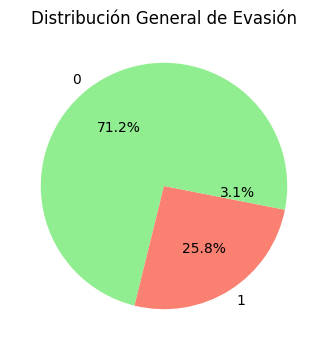

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
df['Evasion'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'salmon']
)
plt.title('Distribución General de Evasión')
plt.ylabel('')
plt.show()



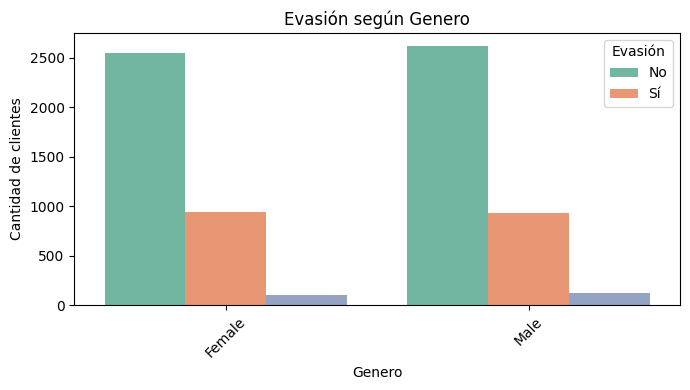

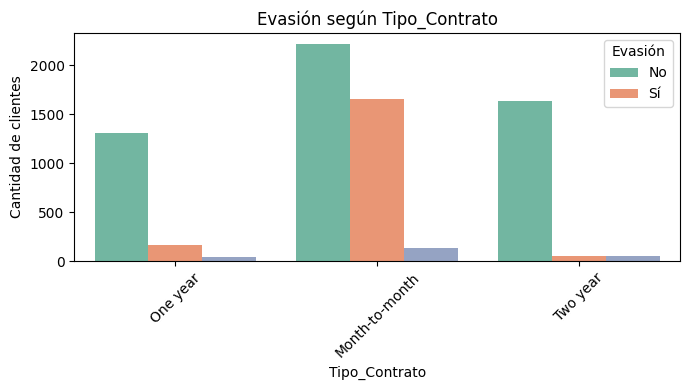

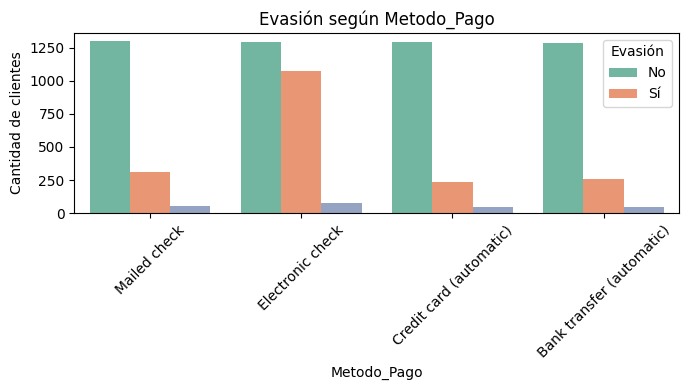

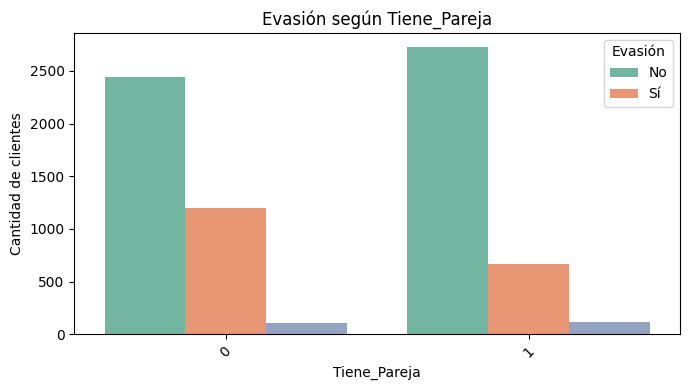

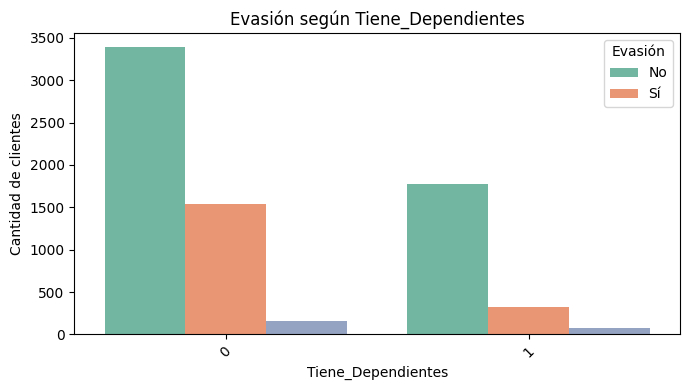

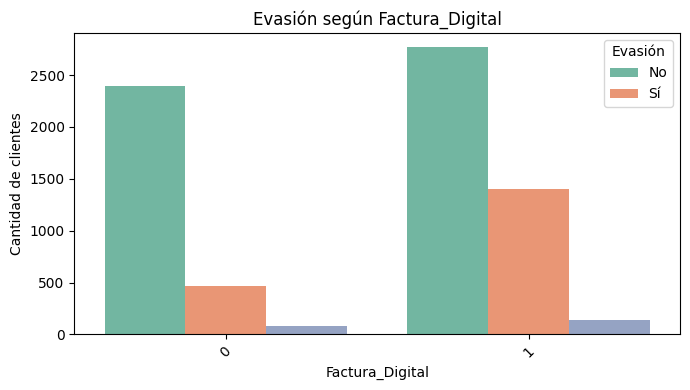

In [ ]:
variables_categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Tiene_Pareja', 'Tiene_Dependientes', 'Factura_Digital']

for var in variables_categoricas:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=var, hue='Evasion', palette='Set2')
    plt.title(f'Evasión según {var}')
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Evasión', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()


In [ ]:
df['Cargo_Total'] = pd.to_numeric(df['Cargo_Total'], errors='coerce')

/tmp/ipython-input-2874030882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasion', y=var, palette='coolwarm')


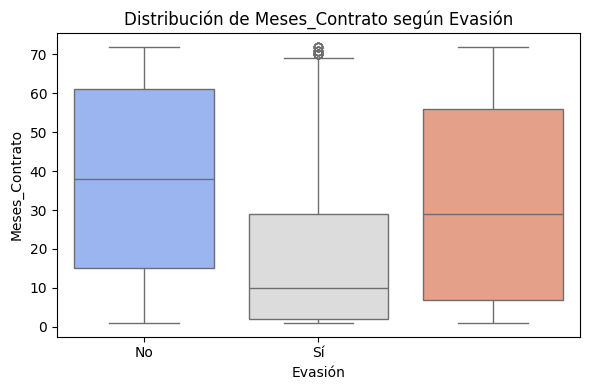

/tmp/ipython-input-2874030882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasion', y=var, palette='coolwarm')


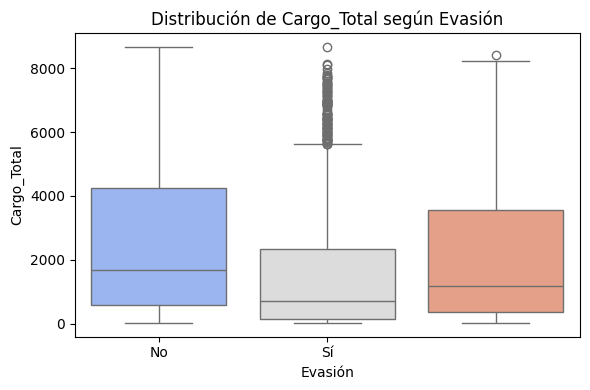

/tmp/ipython-input-2874030882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasion', y=var, palette='coolwarm')


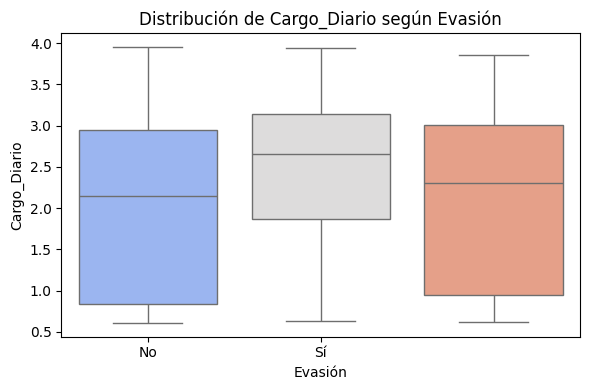

In [ ]:
variables_numericas = ['Meses_Contrato', 'Cargo_Total', 'Cargo_Diario']

for var in variables_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Evasion', y=var, palette='coolwarm')
    plt.title(f'Distribución de {var} según Evasión')
    plt.xlabel('Evasión')
    plt.ylabel(var)
    plt.xticks([0,1], ['No', 'Sí'])
    plt.tight_layout()
    plt.show()


In [ ]:
print(df.columns.tolist())


['customerID', 'Evasion', 'Genero', 'Mayor_65', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Telefono', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV', 'Peliculas', 'Tipo_Contrato', 'Factura_Digital', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']


#📄Informe final

Introducción
La evasión de clientes (o churn) es uno de los principales desafíos para las empresas de telecomunicaciones. Identificar patrones que predicen cuándo un cliente podría cancelar su contrato es esencial para implementar estrategias de retención.
El objetivo de este análisis es explorar los datos de clientes, entender los factores que influyen en la evasión y proporcionar recomendaciones que ayuden a reducir esta pérdida.

Limpieza y Tratamiento de Datos
Se realizó la carga y transformación de los datos desde una fuente JSON/API. Los pasos clave incluyeron:

Conversión del JSON a un DataFrame de pandas.

Verificación de tipos de datos y conversión de columnas como 'Cargo_Total' a valores numéricos.

Eliminación de valores duplicados y verificación de valores nulos (no se encontraron).

Creación de nuevas columnas, como 'Cargo_Diario', para mejorar el análisis.

Estandarización de nombres de columnas y traducción de etiquetas para facilitar la interpretación.

Conversión de respuestas textuales ('Sí', 'No') a valores binarios (1, 0).

Análisis Exploratorio de Datos
Distribución de Evasión
Se analizó la variable 'Evasion' para conocer la proporción de clientes que permanecieron frente a los que se dieron de baja.



<Axes: ylabel='count'>

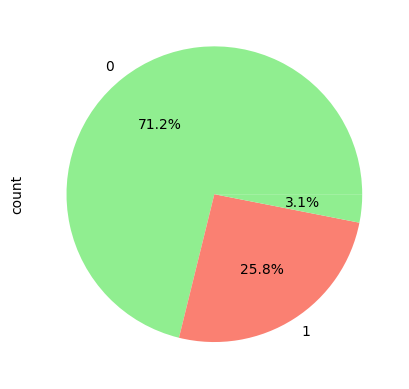

In [ ]:
df['Evasion'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])

Conclusiones e Insights
Los clientes con contratos mensuales tienen una mayor tasa de evasión comparado con contratos anuales o bianuales.

El método de pago también influye: quienes usan "Electronic Check" tienen mayor probabilidad de cancelar.

Menor tiempo de permanencia (tenure) y altos cargos mensuales están correlacionados con una mayor evasión.

La falta de servicios como Soporte Técnico o Seguridad Online parece coincidir con una mayor tasa de cancelaciones.
